In [1]:
import os
import cirq
import qiskit
import pytket
import pytket.qasm
import pytket.passes
import numpy as np
from qiskit.quantum_info import Operator
from natsort import natsorted

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def geometric_mean(arr):
    return np.prod(arr) ** (1 / len(arr))

### Opt all2all

In [10]:
input_dpath = '../benchmarks/uccsd_qasm'


In [11]:
fnames = natsorted(os.listdir(input_dpath))

num_2q_gates_original = []
depth_2q_original = []
for fname in fnames:
    fname = os.path.join(input_dpath, fname)
    circ = qiskit.QuantumCircuit.from_qasm_file(fname)
    num_2q_gates_original.append(circ.num_nonlocal_gates())
    depth_2q_original.append(circ.depth(lambda instr: instr.operation.num_qubits > 1))

fnames_qiskit = [os.path.join('./qiskit_opt', fname) for fname in fnames]
fnames_tket = [fname.replace('qiskit_opt', 'tket_opt') for fname in fnames_qiskit]

In [12]:
num_2q_gates_qiskit = []
num_2q_gates_tket = []
depth_2q_qiskit = []
depth_2q_tket = []

for fname in fnames:
    fname_qiskit = os.path.join('./qiskit_opt', fname)
    fname_tket = fname_qiskit.replace('qiskit_opt', 'tket_opt')

    circ_qiskit = qiskit.QuantumCircuit.from_qasm_file(fname_qiskit)
    circ_tket = qiskit.QuantumCircuit.from_qasm_file(fname_tket)

    print(f'fname: {fname}')
    print('#gates\t {}\t {}'.format(circ_qiskit.size(), circ_tket.size()))
    print('depth\t {}\t {}'.format(circ_qiskit.depth(), circ_tket.depth()))
    print('#2Q\t {}\t {}'.format(circ_qiskit.num_nonlocal_gates(), circ_tket.num_nonlocal_gates()))
    print('dep(2q)\t {}\t {}'.format(
        circ_qiskit.depth(lambda intr: intr.operation.num_qubits > 1),
        circ_tket.depth(lambda intr: intr.operation.num_qubits > 1)
    ))
    num_2q_gates_qiskit.append(circ_qiskit.num_nonlocal_gates())
    num_2q_gates_tket.append(circ_tket.num_nonlocal_gates())
    depth_2q_qiskit.append(circ_qiskit.depth(lambda intr: intr.operation.num_qubits > 1))
    depth_2q_tket.append(circ_tket.depth(lambda intr: intr.operation.num_qubits > 1))

fname: CH2_cmplt_BK_sto3g.qasm
#gates	 20792	 20293
depth	 17406	 16843
#2Q	 14008	 12306
dep(2q)	 13954	 12140
fname: CH2_cmplt_JW_sto3g.qasm
#gates	 22291	 19639
depth	 17199	 15142
#2Q	 14303	 11716
dep(2q)	 13414	 11095
fname: CH2_cmplt_P_sto3g.qasm
#gates	 21532	 20891
depth	 18356	 18636
#2Q	 15259	 14585
dep(2q)	 15204	 14525
fname: CH2_frz_BK_sto3g.qasm
#gates	 11597	 11442
depth	 9712	 9530
#2Q	 7819	 6968
dep(2q)	 7801	 6874
fname: CH2_frz_JW_sto3g.qasm
#gates	 11618	 10084
depth	 8800	 7617
#2Q	 7098	 5700
dep(2q)	 6644	 5379
fname: CH2_frz_P_sto3g.qasm
#gates	 11075	 10728
depth	 9315	 9457
#2Q	 7610	 7228
dep(2q)	 7565	 7180
fname: H2O_cmplt_BK_sto3g.qasm
#gates	 13970	 14021
depth	 11678	 11663
#2Q	 9561	 8630
dep(2q)	 9508	 8537
fname: H2O_cmplt_JW_sto3g.qasm
#gates	 15031	 13150
depth	 11770	 10301
#2Q	 9712	 7950
dep(2q)	 9214	 7614
fname: H2O_cmplt_P_sto3g.qasm
#gates	 14492	 13985
depth	 12406	 12541
#2Q	 10342	 9881
dep(2q)	 10281	 9824
fname: H2O_frz_BK_sto3g.qasm


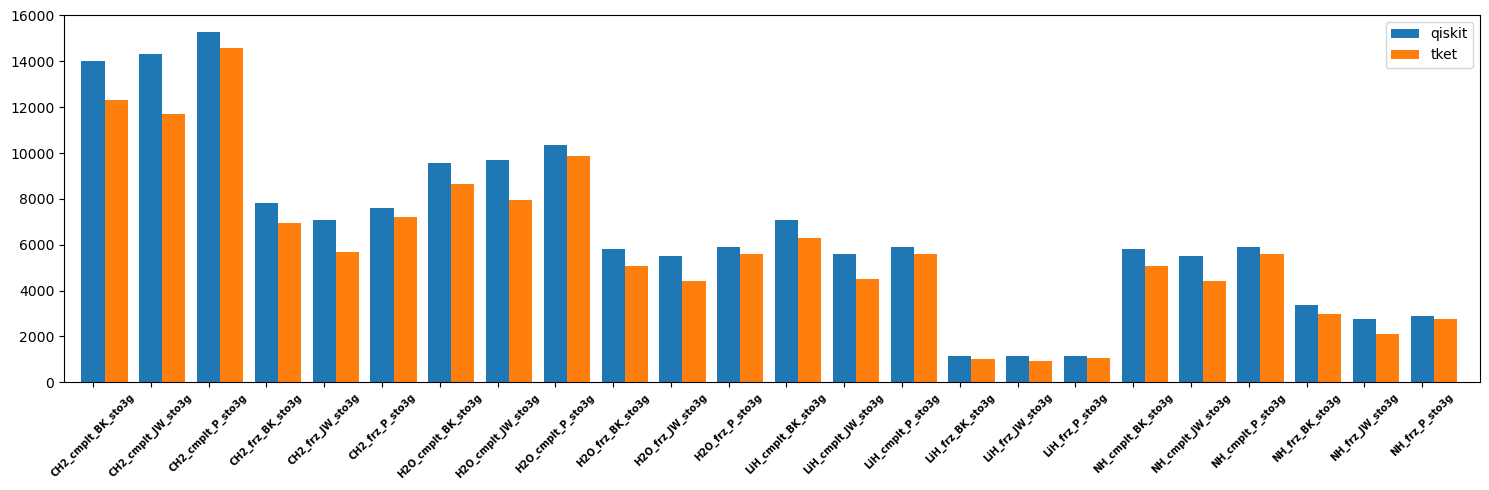

In [13]:
plt.figure(figsize=(15, 5))
width = 0.4
plt.bar(np.arange(len(fnames)), num_2q_gates_qiskit, width, label='qiskit')
plt.bar(np.arange(len(fnames)) + width, num_2q_gates_tket, width, label='tket')
plt.xlim(-0.5, len(fnames))
plt.xticks(np.arange(len(fnames)), [fname.split('.')[0] for fname in fnames], rotation=45, fontsize=7, fontweight='bold')
plt.legend()
plt.tight_layout()

In [14]:
geometric_mean(np.array(num_2q_gates_qiskit) / np.array(num_2q_gates_original)), geometric_mean(np.array(num_2q_gates_tket) / np.array(num_2q_gates_original))


(0.7379117660787283, 0.6460552466899815)

In [15]:
geometric_mean(np.array(depth_2q_qiskit) / np.array(depth_2q_original)), geometric_mean(np.array(depth_2q_tket) / np.array(depth_2q_original))


(0.7382980349233704, 0.6453368081918247)

### Post-Opt all2all

In [19]:
input_dpath = './output_uccsd/phoenix/all2all'

In [20]:
fnames = natsorted(os.listdir(input_dpath))

num_2q_gates_original = []
depth_2q_original = []
for fname in fnames:
    fname = os.path.join(input_dpath, fname)
    circ = qiskit.QuantumCircuit.from_qasm_file(fname)
    num_2q_gates_original.append(circ.num_nonlocal_gates())
    depth_2q_original.append(circ.depth(lambda instr: instr.operation.num_qubits > 1))


fnames_qiskit = [os.path.join('./qiskit_post_opt', fname) for fname in fnames]
fnames_tket = [fname.replace('qiskit_post_opt', 'tket_post_opt') for fname in fnames_qiskit]

In [21]:
num_2q_gates_qiskit = []
num_2q_gates_tket = []
depth_2q_qiskit = []
depth_2q_tket = []

for fname in fnames:
    fname_qiskit = os.path.join('./qiskit_post_opt', fname)
    fname_tket = fname_qiskit.replace('qiskit_post_opt', 'tket_post_opt')

    circ_qiskit = qiskit.QuantumCircuit.from_qasm_file(fname_qiskit)
    circ_tket = qiskit.QuantumCircuit.from_qasm_file(fname_tket)

    print(f'fname: {fname}')
    print('#gates\t {}\t {}'.format(circ_qiskit.size(), circ_tket.size()))
    print('depth\t {}\t {}'.format(circ_qiskit.depth(), circ_tket.depth()))
    print('#2Q\t {}\t {}'.format(circ_qiskit.num_nonlocal_gates(), circ_tket.num_nonlocal_gates()))
    print('dep(2q)\t {}\t {}'.format(
        circ_qiskit.depth(lambda intr: intr.operation.num_qubits > 1),
        circ_tket.depth(lambda intr: intr.operation.num_qubits > 1)
    ))
    num_2q_gates_qiskit.append(circ_qiskit.num_nonlocal_gates())
    num_2q_gates_tket.append(circ_tket.num_nonlocal_gates())
    depth_2q_qiskit.append(circ_qiskit.depth(lambda intr: intr.operation.num_qubits > 1))
    depth_2q_tket.append(circ_tket.depth(lambda intr: intr.operation.num_qubits > 1))

fname: CH2_cmplt_BK_sto3g.qasm
#gates	 6347	 8335
depth	 4293	 5480
#2Q	 3057	 3996
dep(2q)	 2614	 3394
fname: CH2_cmplt_JW_sto3g.qasm
#gates	 9088	 8837
depth	 5878	 5417
#2Q	 4304	 4099
dep(2q)	 3599	 3443
fname: CH2_cmplt_P_sto3g.qasm
#gates	 8108	 9791
depth	 5207	 6247
#2Q	 4108	 4895
dep(2q)	 3463	 4059
fname: CH2_frz_BK_sto3g.qasm
#gates	 3410	 4522
depth	 2337	 3006
#2Q	 1658	 2166
dep(2q)	 1436	 1859
fname: CH2_frz_JW_sto3g.qasm
#gates	 4880	 4741
depth	 3163	 2918
#2Q	 2227	 2111
dep(2q)	 1881	 1792
fname: CH2_frz_P_sto3g.qasm
#gates	 4197	 5188
depth	 2725	 3292
#2Q	 2057	 2519
dep(2q)	 1741	 2062
fname: H2O_cmplt_BK_sto3g.qasm
#gates	 4234	 5801
depth	 2958	 3850
#2Q	 2066	 2793
dep(2q)	 1819	 2385
fname: H2O_cmplt_JW_sto3g.qasm
#gates	 6100	 5922
depth	 3998	 3681
#2Q	 2889	 2749
dep(2q)	 2434	 2330
fname: H2O_cmplt_P_sto3g.qasm
#gates	 5568	 7346
depth	 3621	 4723
#2Q	 2874	 3745
dep(2q)	 2424	 3122
fname: H2O_frz_BK_sto3g.qasm
#gates	 2605	 2837
depth	 1716	 1830
#2Q	 11

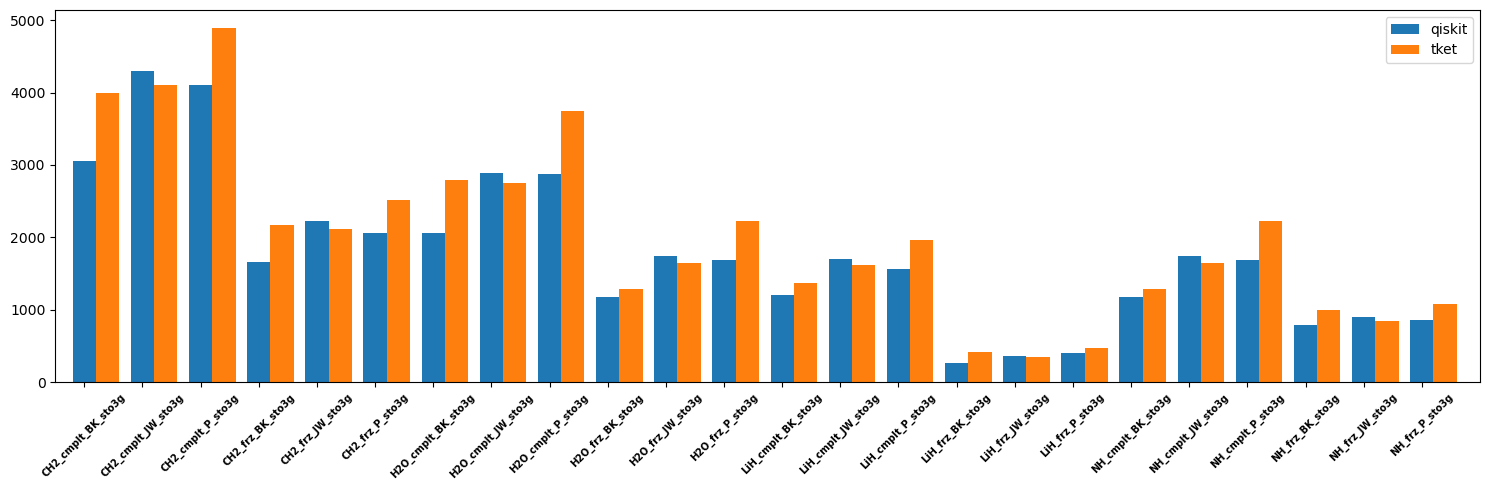

In [27]:
plt.figure(figsize=(15, 5))
width = 0.4
plt.bar(np.arange(len(fnames)), num_2q_gates_qiskit, width, label='qiskit')
plt.bar(np.arange(len(fnames)) + width, num_2q_gates_tket, width, label='tket')

plt.xlim(-0.5, len(fnames))
plt.xticks(np.arange(len(fnames)), [fname.split('.')[0] for fname in fnames], rotation=45, fontsize=7, fontweight='bold')
plt.legend()
plt.tight_layout()

In [24]:
geometric_mean(np.array(num_2q_gates_qiskit) / np.array(num_2q_gates_original)), geometric_mean(np.array(num_2q_gates_tket) / np.array(num_2q_gates_original))


(0.6899362221357302, 0.7882398199025824)

In [23]:
geometric_mean(np.array(depth_2q_qiskit) / np.array(depth_2q_original)), geometric_mean(np.array(depth_2q_tket) / np.array(depth_2q_original))

(0.6713637828162446, 0.765342691515869)

### Post-Opt Manhattan

In [28]:
input_dpath = './output_uccsd/phoenix/all2all'


In [62]:
fnames = natsorted(os.listdir(input_dpath))

num_2q_gates_original = []
depth_2q_original = []
for fname in fnames:
    fname = os.path.join(input_dpath, fname)
    circ = qiskit.QuantumCircuit.from_qasm_file(fname)
    num_2q_gates_original.append(circ.num_nonlocal_gates())
    depth_2q_original.append(circ.depth(lambda instr: instr.operation.num_qubits > 1))


fnames_qiskit = [os.path.join('./qiskit_post_opt_manhattan', fname) for fname in fnames]
fnames_tket = [fname.replace('qiskit_post_opt_manhattan', 'tket_post_opt_manhattan') for fname in fnames_qiskit]

In [63]:
num_2q_gates_qiskit = []
num_2q_gates_tket = []
depth_2q_qiskit = []
depth_2q_tket = []

for fname in fnames:
    fname_qiskit = os.path.join('./qiskit_post_opt_manhattan', fname)
    fname_tket = fname_qiskit.replace('qiskit_post_opt_manhattan', 'tket_post_opt_manhattan')

    try:
        circ_qiskit = qiskit.QuantumCircuit.from_qasm_file(fname_qiskit)
        circ_tket = qiskit.QuantumCircuit.from_qasm_file(fname_tket)
    except:
        continue

    print(f'fname: {fname}')
    # print('#gates\t {}\t {}'.format(circ_qiskit.size(), circ_tket.size()))
    # print('depth\t {}\t {}'.format(circ_qiskit.depth(), circ_tket.depth()))
    print('#2Q\t {}\t {}'.format(circ_qiskit.num_nonlocal_gates(), circ_tket.num_nonlocal_gates()))
    print('dep(2q)\t {}\t {}'.format(
        circ_qiskit.depth(lambda intr: intr.operation.num_qubits > 1),
        circ_tket.depth(lambda intr: intr.operation.num_qubits > 1)
    ))
    num_2q_gates_qiskit.append(circ_qiskit.num_nonlocal_gates())
    num_2q_gates_tket.append(circ_tket.num_nonlocal_gates())
    depth_2q_qiskit.append(circ_qiskit.depth(lambda intr: intr.operation.num_qubits > 1))
    depth_2q_tket.append(circ_tket.depth(lambda intr: intr.operation.num_qubits > 1))

fname: CH2_cmplt_BK_sto3g.qasm
#2Q	 12632	 13200
dep(2q)	 8865	 8936
fname: CH2_cmplt_JW_sto3g.qasm
#2Q	 15359	 13938
dep(2q)	 10498	 9165
fname: CH2_cmplt_P_sto3g.qasm
#2Q	 21350	 17627
dep(2q)	 13911	 11343
fname: CH2_frz_BK_sto3g.qasm
#2Q	 6249	 6505
dep(2q)	 4654	 4716
fname: CH2_frz_JW_sto3g.qasm
#2Q	 7129	 6505
dep(2q)	 5204	 4572
fname: CH2_frz_P_sto3g.qasm
#2Q	 8270	 8185
dep(2q)	 5804	 5668
fname: H2O_cmplt_BK_sto3g.qasm
#2Q	 8980	 9407
dep(2q)	 6302	 6303
fname: H2O_cmplt_JW_sto3g.qasm
#2Q	 10090	 9247
dep(2q)	 7176	 6243
fname: H2O_cmplt_P_sto3g.qasm
#2Q	 15406	 13963
dep(2q)	 9788	 8743
fname: H2O_frz_BK_sto3g.qasm
#2Q	 3949	 3760
dep(2q)	 3016	 2747
fname: H2O_frz_JW_sto3g.qasm
#2Q	 5402	 4909
dep(2q)	 4040	 3667
fname: H2O_frz_P_sto3g.qasm
#2Q	 7221	 7182
dep(2q)	 4948	 5007
fname: LiH_cmplt_BK_sto3g.qasm
#2Q	 3910	 3609
dep(2q)	 3093	 2754
fname: LiH_cmplt_JW_sto3g.qasm
#2Q	 5437	 4889
dep(2q)	 4088	 3561
fname: LiH_cmplt_P_sto3g.qasm
#2Q	 6310	 6126
dep(2q)	 4423	 4330


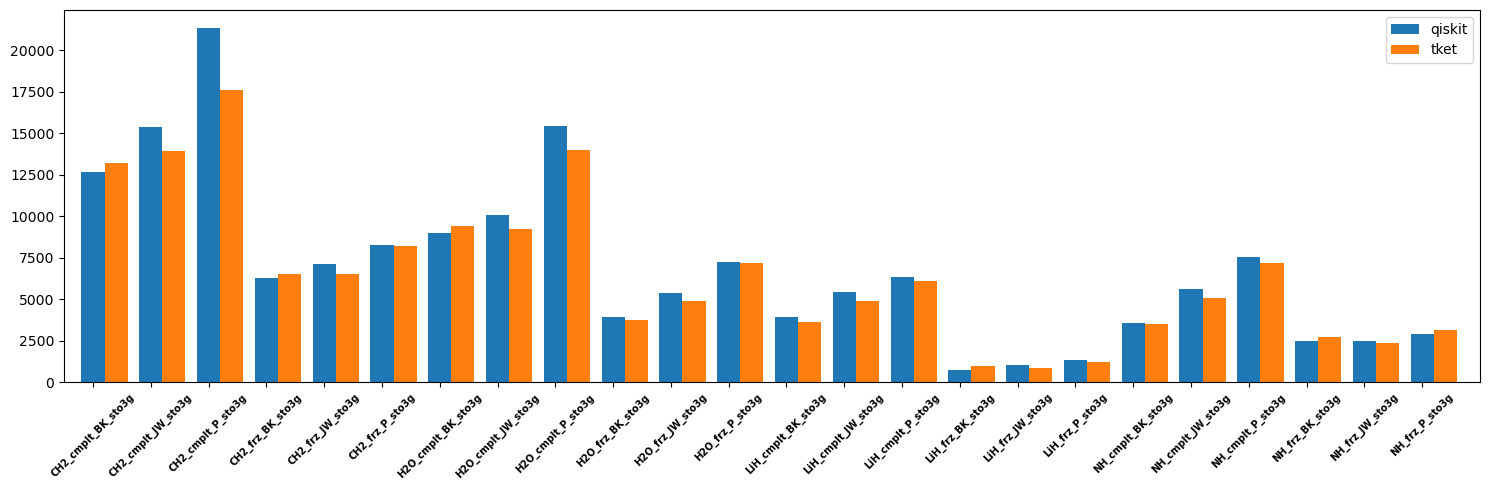

In [64]:
plt.figure(figsize=(15, 5))
width = 0.4
plt.bar(np.arange(len(fnames)), num_2q_gates_qiskit, width, label='qiskit')
plt.bar(np.arange(len(fnames)) + width, num_2q_gates_tket, width, label='tket')

plt.xlim(-0.5, len(fnames))
plt.xticks(np.arange(len(fnames)), [fname.split('.')[0] for fname in fnames], rotation=45, fontsize=7, fontweight='bold')
plt.legend()
plt.tight_layout()

In [65]:
geometric_mean(np.array(num_2q_gates_qiskit) / np.array(num_2q_gates_original)), geometric_mean(np.array(num_2q_gates_tket) / np.array(num_2q_gates_original))

(2.4694905521501562, 2.3822805683664923)

In [66]:
geometric_mean(np.array(depth_2q_qiskit) / np.array(depth_2q_original)), geometric_mean(np.array(depth_2q_tket) / np.array(depth_2q_original))

(2.056643758602344, 1.9514354673006766)

fname: CH2_cmplt_BK_sto3g.qasm
#2Q	 12632	 13200	 13494	 12078
dep(2q)	 8865	 9142	 9142	 8061
fname: CH2_cmplt_JW_sto3g.qasm
#2Q	 15359	 13938	 14037	 14449
dep(2q)	 10498	 9360	 9360	 9576
fname: CH2_cmplt_P_sto3g.qasm
#2Q	 21350	 17627	 17914	 16491
dep(2q)	 13911	 11376	 11376	 10605
fname: H2O_cmplt_BK_sto3g.qasm
#2Q	 8980	 9407	 9206	 8105
dep(2q)	 6302	 6261	 6261	 5606
fname: H2O_cmplt_JW_sto3g.qasm
#2Q	 10090	 9247	 9370	 9558
dep(2q)	 7176	 6495	 6495	 6370
fname: H2O_cmplt_P_sto3g.qasm
#2Q	 15406	 13963	 13832	 13087
dep(2q)	 9788	 9065	 9065	 8337
fname: H2O_frz_BK_sto3g.qasm
#2Q	 3949	 3760	 3592	 3156
dep(2q)	 3016	 2691	 2691	 2318
fname: H2O_frz_JW_sto3g.qasm
#2Q	 5402	 4909	 5089	 5240
dep(2q)	 4040	 3617	 3617	 3813
fname: H2O_frz_P_sto3g.qasm
#2Q	 7221	 7182	 7337	 6273
dep(2q)	 4948	 4998	 4998	 4270
fname: LiH_cmplt_BK_sto3g.qasm
#2Q	 3910	 3609	 3669	 3264
dep(2q)	 3093	 2824	 2824	 2464
fname: LiH_cmplt_JW_sto3g.qasm
#2Q	 5437	 4889	 4828	 4750
dep(2q)	 4088	 364

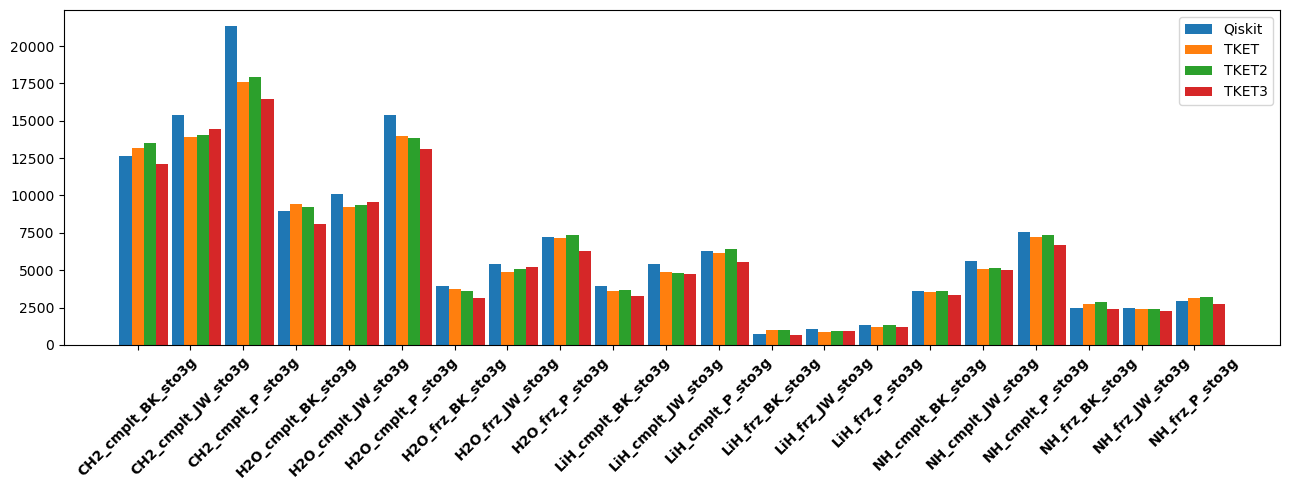

In [67]:
num_2q_gates_qiskit = []
num_2q_gates_tket = []
num_2q_gates_tket2 = []
num_2q_gates_tket3 = []
depth_2q_qiskit = []
depth_2q_tket = []
depth_2q_tket2 = []
depth_2q_tket3 = []

fnames = natsorted(os.listdir('tket_post_opt_manhattan3'))
for fname in fnames:
    fname_qiskit = os.path.join('qiskit_post_opt_manhattan', fname)
    fname_tket = os.path.join('tket_post_opt_manhattan', fname)
    fname_tket2 = os.path.join('tket_post_opt_manhattan2', fname)
    fname_tket3 = os.path.join('tket_post_opt_manhattan3', fname)

    circ_qiskit = qiskit.QuantumCircuit.from_qasm_file(fname_qiskit)
    circ_tket = qiskit.QuantumCircuit.from_qasm_file(fname_tket)
    circ_tket2 = qiskit.QuantumCircuit.from_qasm_file(fname_tket2)
    circ_tket3 = qiskit.QuantumCircuit.from_qasm_file(fname_tket3)

    print(f'fname: {fname}')
    # print('#gates\t {}\t {}'.format(circ_tket.size(), circ_tket2.size()))
    # print('depth\t {}\t {}'.format(circ_tket.depth(), circ_tket2.depth()))
    print('#2Q\t {}\t {}\t {}\t {}'.format(
        circ_qiskit.num_nonlocal_gates(),
        circ_tket.num_nonlocal_gates(),
        circ_tket2.num_nonlocal_gates(),
        circ_tket3.num_nonlocal_gates()))
    print('dep(2q)\t {}\t {}\t {}\t {}'.format(
        circ_qiskit.depth(lambda instr: instr[0].num_qubits > 1),
        circ_tket2.depth(lambda intr: intr.operation.num_qubits > 1),
        circ_tket2.depth(lambda intr: intr.operation.num_qubits > 1),
        circ_tket3.depth(lambda intr: intr.operation.num_qubits > 1)
    ))

    num_2q_gates_qiskit.append(circ_qiskit.num_nonlocal_gates())
    num_2q_gates_tket.append(circ_tket.num_nonlocal_gates())
    num_2q_gates_tket2.append(circ_tket2.num_nonlocal_gates())
    num_2q_gates_tket3.append(circ_tket3.num_nonlocal_gates())
    depth_2q_qiskit.append(circ_qiskit.depth(lambda instr: instr[0].num_qubits > 1))
    depth_2q_tket.append(circ_tket.depth(lambda intr: intr.operation.num_qubits > 1))
    depth_2q_tket2.append(circ_tket2.depth(lambda intr: intr.operation.num_qubits > 1))
    depth_2q_tket3.append(circ_tket3.depth(lambda intr: intr.operation.num_qubits > 1))

plt.figure(figsize=(13, 5))
ind = np.arange(len(fnames))
width = 0.23
plt.bar(ind - width, num_2q_gates_qiskit, width, label='Qiskit')
plt.bar(ind, num_2q_gates_tket, width, label='TKET')
plt.bar(ind + width, num_2q_gates_tket2, width, label='TKET2')
plt.bar(ind + 2 * width, num_2q_gates_tket3, width, label='TKET3')
plt.xticks(ind, [fname.split('.')[0] for fname in fnames], rotation=45, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()
